## iPyLeaflet
[ipyleaflet](https://github.com/ellisonbg/ipyleaflet) is a bridge between jupyter notebooks and the [leaflet](http://leafletjs.com/)  javascript library for drawing maps.

ipyleaflet comes with a few examples notebooks (this notebook was derived from one) but very little documentation,
for more documentation read the [Leaflet IPA](http://leafletjs.com/reference.html)

For installation directions, see the README on [ipyleaflet](https://github.com/ellisonbg/ipyleaflet)

[GeoJson](https://tools.ietf.org/html/rfc7946#section-3.1.7) is a good way to add data on top of an ipyleaflet map.

For other backgrounds than open streets, you can alter the ipyleaflet.py file to point to one of [these map providers](https://leaflet-extras.github.io/leaflet-providers/preview/)

In [2]:
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

## Visualizing the distribution of the observations

## Load the required libraries

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
import pylab as plt

import sys
sys.path.append('./lib')

from leaflet import *

In [111]:
data_dir = "../../Data/Weather/"
from pickle import load
with open(data_dir+'SNWD_residuals_PCA.pickle','rb') as file:
#with open(data_dir+'PRCP_residuals_PCA.pickle','rb') as file:
    Res_eig=load(file)
print Res_eig.keys()


#stations.pkl
with open(data_dir+'stations.pkl','rb') as file:
    Stations=load(file)
Stations.head()


Index([u'coeff_1', u'coeff_2', u'coeff_3', u'elevation', u'label', u'latitude',
       u'longitude', u'measurement', u'res_1', u'res_2', u'res_3', u'res_mean',
       u'station', u'total_var', u'undefs', u'vector', u'year'],
      dtype='object')


,latitude,longitude,elevation,state,name,GSNFLAG,HCNFLAG,WMOID
ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
AF000040930,35.3170,69.0170,3366.0,NaN,NORTH-SALANG,GSN,NaN,40930.0
AG000060390,36.7167,3.2500,24.0,NaN,ALGER-DAR EL BEIDA,GSN,NaN,60390.0


In [219]:
Stations.loc[Stations.index == 'USC00045863']

,latitude,longitude,elevation,state,name,GSNFLAG,HCNFLAG,WMOID
USC00045863,34.0333,-116.5833,780.9,A,MORONGO VALLEY,NaN,NaN,NaN


In [254]:
Stations.loc[Stations.index == 'USC00046196']

,latitude,longitude,elevation,state,name,GSNFLAG,HCNFLAG,WMOID
USC00046196,33.5833,-116.4333,1229.0,A,NIGHTINGALE,NaN,NaN,NaN


In [112]:
import pandas as pd
#Eig=pd.DataFrame(Res_eig['eigen-vecs'].transpose())
Eig=pd.DataFrame(Res_eig)
Eig.head()

,coeff_1,coeff_2,coeff_3,elevation,label,latitude,longitude,measurement,res_1,res_2,res_3,res_mean,station,total_var,undefs,vector,year
0,0.481323,-0.445516,-310.702415,1229.0,SSSSSSBB,33.5833,-116.4333,SNWD,0.999998,0.999996,0.000004,0.999118,USC00046196,96622.0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1964.0
1,-785.382482,0.202109,-0.050314,1229.0,SSSSSSBB,33.5833,-116.4333,SNWD,0.000187,0.000187,0.000187,0.998964,USC00046196,617581.0,31,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1967.0
2,0.676954,470.587636,-0.168084,780.9,SSSSSSBB,34.0333,-116.5833,SNWD,0.999998,0.001203,0.001203,0.998942,USC00045863,221956.0,10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1949.0
3,0.407538,-0.254943,0.137349,365.8,SSSSSSBB,33.6514,-116.3764,SNWD,0.333064,0.128074,0.051880,inf,USC00042327,0.0,13,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1983.0
4,0.407538,-0.254943,0.137349,381.0,SSSSSSBB,33.4833,-111.9667,SNWD,0.338948,0.127742,0.052220,inf,USC00021161,0.0,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1955.0


In [119]:
len(np.array(Eig.ix[1,:]['vector']))

730

In [140]:
np.frombuffer(Eig.ix[2004,:]['vector'],np.float16)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [124]:
len(list(Eig.ix[1,:]['vector']))

730

In [51]:
#np.array(Eig.ix[7,:]['vector'])

In [145]:
Eig['vector'].apply(lambda x: np.nansum(np.frombuffer(x,np.float16)))

0        558.0
1       2007.0
2       1118.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
         ...  
2252       0.0
2253       0.0
2254       0.0
2255       0.0
2256       0.0
2257       0.0
2258       0.0
2259      75.0
2260       0.0
2261       0.0
2262       0.0
2263     152.0
2264      25.0
2265      76.0
2266     101.0
2267      51.0
2268     203.0
2269     102.0
2270      76.0
2271      25.0
2272      25.0
2273      25.0
2274      25.0
2275      25.0
2276      50.0
2277      51.0
2278      51.0
2279      76.0
2280     406.0
2281     254.0
Name: vector, dtype: float64

In [146]:
Eig['vector_sum'] = (Eig['vector'].apply(lambda x: np.nansum(np.frombuffer(x,np.float16))) > 1)


In [231]:
Eig['vector_list'] = Eig['vector'].apply(lambda x: np.where(np.frombuffer(x,np.float16)>0)[0])
#Eig['vector_list'] = Eig['vector'].apply(lambda x: np.count_nonzero(~np.isnan(np.frombuffer(x,np.float16))))

In [232]:
Eig

,coeff_1,coeff_2,coeff_3,elevation,label,latitude,longitude,measurement,res_1,res_2,res_3,res_mean,station,total_var,undefs,vector,year,vector_sum,vector_list
0,0.481323,-0.445516,-310.702415,1229.0,SSSSSSBB,33.5833,-116.4333,SNWD,0.999998,0.999996,0.000004,0.999118,USC00046196,96622.0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1964.0,True,"[320, 321, 322, 323, 324]"
1,-785.382482,0.202109,-0.050314,1229.0,SSSSSSBB,33.5833,-116.4333,SNWD,0.000187,0.000187,0.000187,0.998964,USC00046196,617581.0,31,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1967.0,True,"[346, 347, 348, 349, 350, 352, 353, 354, 355]"
2,0.676954,470.587636,-0.168084,780.9,SSSSSSBB,34.0333,-116.5833,SNWD,0.999998,0.001203,0.001203,0.998942,USC00045863,221956.0,10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1949.0,True,"[9, 10, 11, 12, 13, 19, 20]"
3,0.407538,-0.254943,0.137349,365.8,SSSSSSBB,33.6514,-116.3764,SNWD,0.333064,0.128074,0.051880,inf,USC00042327,0.0,13,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1983.0,False,[]
4,0.407538,-0.254943,0.137349,381.0,SSSSSSBB,33.4833,-111.9667,SNWD,0.338948,0.127742,0.052220,inf,USC00021161,0.0,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1955.0,False,[]
5,0.407538,-0.254943,0.137349,638.6,SSSSSSBB,33.9792,-112.7403,SNWD,0.273162,0.136874,0.053846,inf,USC00029287,0.0,39,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",2009.0,False,[]
6,0.407538,-0.254943,0.137349,345.9,SSSSSSBB,33.3369,-112.1472,SNWD,0.276836,0.136782,0.054172,inf,USC00024829,0.0,19,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1985.0,False,[]
7,0.407538,-0.254943,0.137349,271.3,SSSSSSBB,33.3761,-112.5828,SNWD,0.152148,0.152426,0.055593,inf,USC00021026,0.0,46,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",1946.0,False,[]
8,0.407538,-0.254943,0.137349,227.7,SSSSSSBB,33.7378,-115.3925,SNWD,0.152148,0.152426,0.055593,inf,USC00042410,0.0,32,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",2004.0,False,[]
9,0.407538,-0.254943,0.137349,396.2,SSSSSSBB,33.4203,-112.8600,SNWD,0.152148,0.152426,0.055593,inf,USC00028641,0.0,39,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",1956.0,False,[]


In [149]:
np.where(np.array([1,2,3,4,5,np.nan])>2)

/Users/vincentsiu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


(array([2, 3, 4]),)

In [150]:
len(Eig[Eig['vector_sum'] == True]['station'].unique())

11

In [151]:
Eig[Eig['vector_sum'] == True][['year','vector']].groupby(['year']).agg(['count']).values.flatten()

array([1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 3, 1, 2, 1, 1])

In [152]:
Eig[Eig['vector_sum'] == True][['year','vector']].groupby(['year']).agg(['count']).index.values

array([ 1916.,  1917.,  1937.,  1949.,  1951.,  1955.,  1957.,  1960.,
        1962.,  1964.,  1967.,  1970.,  1979.,  1998.,  2007.])

<Container object of 15 artists>

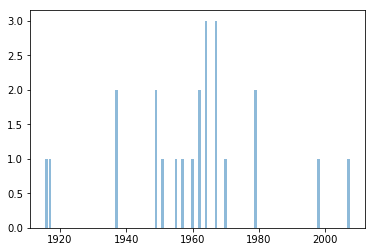

In [153]:
%matplotlib inline

plt.bar(Eig[Eig['vector_sum'] == True][['year','vector']].groupby(['year']).agg(['count']).index.values,\
        Eig[Eig['vector_sum'] == True][['year','vector']].groupby(['year']).agg(['count']).values.flatten(),\
        align='center', alpha=0.5)

In [233]:
df_ww = Eig[Eig['vector_sum'] == True][['year','elevation','latitude','longitude','station','vector_sum','vector_list']].sort_index(by=['year'], ascending=[True])
df_ww

/Users/vincentsiu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,year,elevation,latitude,longitude,station,vector_sum,vector_list
2277,1916.0,638.6,33.9792,-112.7403,USC00029287,True,[360]
2272,1917.0,638.6,33.9792,-112.7403,USC00029287,True,[16]
2279,1937.0,659.9,33.9433,-113.1875,USC00020060,True,[7]
2269,1937.0,351.1,33.4333,-111.9333,USC00028489,True,[20]
2,1949.0,780.9,34.0333,-116.5833,USC00045863,True,"[9, 10, 11, 12, 13, 19, 20]"
2266,1949.0,417.6,33.7044,-115.6289,USC00043855,True,"[11, 24]"
2275,1951.0,780.9,34.0333,-116.5833,USC00045863,True,[60]
2265,1955.0,780.9,34.0333,-116.5833,USC00045863,True,"[10, 18]"
2280,1957.0,780.9,34.0333,-116.5833,USC00045863,True,"[26, 27, 28]"
2281,1960.0,780.9,34.0333,-116.5833,USC00045863,True,"[341, 342]"


In [235]:
lst_col = 'vector_list'

df_wwus = pd.DataFrame({col:np.repeat(df_ww[col].values, df_ww[lst_col].str.len())for col in df_ww.columns.difference([lst_col])}).assign(**{lst_col:np.concatenate(df_ww[lst_col].values)})[df_ww.columns.tolist()]

In [245]:
df_wwus

,year,elevation,latitude,longitude,station,vector_sum,vector_list
0,1916.0,638.6,33.9792,-112.7403,USC00029287,True,360
1,1917.0,638.6,33.9792,-112.7403,USC00029287,True,16
2,1937.0,659.9,33.9433,-113.1875,USC00020060,True,7
3,1937.0,351.1,33.4333,-111.9333,USC00028489,True,20
4,1949.0,780.9,34.0333,-116.5833,USC00045863,True,9
5,1949.0,780.9,34.0333,-116.5833,USC00045863,True,10
6,1949.0,780.9,34.0333,-116.5833,USC00045863,True,11
7,1949.0,780.9,34.0333,-116.5833,USC00045863,True,12
8,1949.0,780.9,34.0333,-116.5833,USC00045863,True,13
9,1949.0,780.9,34.0333,-116.5833,USC00045863,True,19


In [156]:
Eig[Eig['vector_sum'] == True]['station'].unique()

array([u'USC00046196', u'USC00045863', u'USC00043855', u'USC00027453',
       u'USC00021365', u'USC00045502', u'USC00028489', u'USC00020060',
       u'USC00029287', u'USC00021282', u'USC00042327'], dtype=object)

In [37]:
np.nansum(np.array([1, 2, 3.0]))

6.0

In [32]:
df_temp = Eig[['coeff_1', 'coeff_2', 'coeff_3', 'elevation', 'label', 'latitude',\
       'longitude', 'measurement', 'res_1', 'res_2', 'res_3', 'res_mean',\
       'station', 'total_var', 'undefs', 'vector', 'year']].groupby(\
        ['station','elevation', 'label', 'latitude','longitude', 'measurement']).\
    agg({
    'coeff_1' : [np.mean, np.min, np.max],
    'coeff_2' : [np.mean, np.min, np.max],
    'coeff_3' : [np.mean, np.min, np.max],
    'res_1' : [np.mean, np.min, np.max],
    'res_2' : [np.mean, np.min, np.max],
    'res_3' : [np.mean, np.min, np.max]
    })

df_temp.columns = [' '.join(col).strip() for col in df_temp.columns.values]
df_temp = df_temp.reset_index()

In [33]:
df_temp

,station,elevation,label,latitude,longitude,measurement,coeff_1 mean,coeff_1 amin,coeff_1 amax,coeff_3 mean,...,coeff_2 amax,res_2 mean,res_2 amin,res_2 amax,res_3 mean,res_3 amin,res_3 amax,res_1 mean,res_1 amin,res_1 amax
0,USC00020060,659.9,SSSSSSBB,33.9433,-113.1875,SNWD,0.407682,0.407538,0.412243,0.138225,...,-0.254943,0.274502,0.152962,0.999959,0.215192,0.056192,0.999955,0.476757,0.152684,1.001606
1,USC00020104,348.1,SSSSSSBB,33.5167,-112.1167,SNWD,0.407538,0.407538,0.407538,0.137349,...,-0.254943,0.238351,0.238351,0.238351,0.176173,0.176173,0.176173,0.452578,0.452578,0.452578
2,USC00020406,381.0,SSSSSSBB,33.5000,-111.9833,SNWD,0.407538,0.407538,0.407538,0.137349,...,-0.254943,0.238351,0.238351,0.238351,0.176173,0.176173,0.176173,0.452578,0.452578,0.452578
3,USC00020660,387.1,SSSSSSBB,33.6667,-112.3833,SNWD,0.407538,0.407538,0.407538,0.137349,...,-0.254943,0.238351,0.238351,0.238351,0.176173,0.176173,0.176173,0.452578,0.452578,0.452578
4,USC00020949,281.9,SSSSSSBB,33.9431,-114.0242,SNWD,0.407538,0.407538,0.407538,0.137349,...,-0.254943,0.236831,0.152962,0.238351,0.174053,0.056192,0.176173,0.447372,0.152684,0.452578
5,USC00021026,271.3,SSSSSSBB,33.3761,-112.5828,SNWD,0.407538,0.407538,0.407538,0.137349,...,-0.254943,0.238167,0.152426,0.490646,0.175622,0.055593,0.342275,0.453831,0.152148,1.001606
6,USC00021161,381.0,SSSSSSBB,33.4833,-111.9667,SNWD,0.407538,0.407538,0.407538,0.137349,...,-0.254943,0.230450,0.127742,0.238351,0.167319,0.052220,0.176173,0.444461,0.338948,0.452578
7,USC00021282,771.1,SSSSSSBB,33.8161,-111.9019,SNWD,0.407548,0.407538,0.407942,0.137372,...,-0.254943,0.265103,0.237736,0.999629,0.202324,0.175507,0.999598,0.481395,0.452128,1.001603
8,USC00021295,488.0,SSSSSSBB,33.8500,-112.2667,SNWD,0.407538,0.407538,0.407538,0.137349,...,-0.254943,0.238351,0.238351,0.238351,0.176173,0.176173,0.176173,0.452578,0.452578,0.452578
9,USC00021353,606.6,SSSSSSBB,33.9825,-112.3617,SNWD,0.407538,0.407538,0.407538,0.137349,...,-0.254943,0.234718,0.152426,0.248901,0.171013,0.055593,0.183962,0.439369,0.152148,0.453311


In [ ]:
#['coeff_1', 'coeff_2', 'coeff_3', 'elevation', 'label', 'latitude',\
#       'longitude', 'measurement', 'res_1', 'res_2', 'res_3', 'res_mean',\
#       'station', 'total_var', 'undefs', 'vector', 'year']

In [6]:
#Eig['station']=Res_eig['stations']

Eig=Eig.set_index('station')
print Res_eig['stations'][:5]
Eig.head()

[u'USW00023183', u'USC00028112', u'US1AZMR0222', u'US1AZMR0220', u'USC00028598']


,0,1,2,3
station,,,,
USW00023183,-0.050746,-0.048421,0.122636,-0.138189
USC00028112,-0.121794,-0.132799,0.164543,-0.039343
US1AZMR0222,-0.109721,-0.029603,0.021130,-0.006370
US1AZMR0220,-0.117680,-0.024765,-0.020620,0.065599
USC00028598,-0.119310,-0.019368,-0.004842,0.044660


In [7]:
table=Eig.join(Stations,how='left')

In [8]:
table=table[['name','latitude','longitude','elevation',0,1,2,3]]
table.head(4)

,name,latitude,longitude,elevation,0,1,2,3
station,,,,,,,,
USW00023183,PHOENIX SKY HARBOR INTL AP,33.4278,-112.0039,337.4,-0.050746,-0.048421,0.122636,-0.138189
USC00028112,SOUTH PHOENIX,33.3814,-112.0700,352.0,-0.121794,-0.132799,0.164543,-0.039343
US1AZMR0222,PHOENIX 6.7 WSW,33.4094,-112.1810,308.8,-0.109721,-0.029603,0.021130,-0.006370
US1AZMR0220,PHOENIX 12.8 N,33.6258,-112.0591,444.1,-0.117680,-0.024765,-0.020620,0.065599


In [9]:
import pylab as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [10]:
table[table['longitude'] < -116]

,name,latitude,longitude,elevation,0,1,2,3
station,,,,,,,,
USW00093138,PALM SPRINGS RGNL AP,33.8281,-116.5053,128.3,-0.126607,-0.016235,-0.032581,0.045972
USW00003104,DESERT RESORTS RGNL AP,33.6267,-116.1594,-36.0,-0.119326,-0.049864,0.058361,0.016466
USC00046635,PALM SPRINGS,33.8275,-116.5097,129.5,-0.093253,-0.023958,0.011710,-0.033764
USC00045860,MORONGO VALLEY NORTH,34.0864,-116.5622,958.6,-0.120077,-0.000042,-0.049499,0.003131
USC00046630,PALM DESERT,33.7333,-116.3833,59.4,-0.113364,-0.017700,-0.012054,-0.003854
USC00045502,MECCA FIRE STN,33.5714,-116.0767,-54.9,-0.106889,-0.012694,0.000195,-0.001529
US1CARV0004,DESERT HOT SPRINGS 3.0 NW,33.9855,-116.5415,408.1,-0.121688,-0.011414,-0.021956,0.015796
US1CASR0022,MORONGO VALLEY 2.3 NE,34.0867,-116.5618,960.7,-0.099028,0.056024,-0.204484,-0.047194
USC00042103,COYOTE CANYON,33.4333,-116.5000,694.9,-0.119682,-0.022389,-0.022312,0.026755


In [11]:
table

,name,latitude,longitude,elevation,0,1,2,3
station,,,,,,,,
USW00023183,PHOENIX SKY HARBOR INTL AP,33.4278,-112.0039,337.4,-0.050746,-0.048421,0.122636,-0.138189
USC00028112,SOUTH PHOENIX,33.3814,-112.0700,352.0,-0.121794,-0.132799,0.164543,-0.039343
US1AZMR0222,PHOENIX 6.7 WSW,33.4094,-112.1810,308.8,-0.109721,-0.029603,0.021130,-0.006370
US1AZMR0220,PHOENIX 12.8 N,33.6258,-112.0591,444.1,-0.117680,-0.024765,-0.020620,0.065599
USC00028598,TOLLESON 1 E,33.4519,-112.2433,312.4,-0.119310,-0.019368,-0.004842,0.044660
USW00093138,PALM SPRINGS RGNL AP,33.8281,-116.5053,128.3,-0.126607,-0.016235,-0.032581,0.045972
USC00024977,LITCHFIELD PARK,33.4992,-112.3631,317.0,-0.113641,-0.012951,-0.025390,0.006560
US1AZMR0303,PHOENIX 6.3 ENE,33.4775,-111.9710,371.9,-0.126941,-0.012768,-0.037079,-0.013635
US1AZMR0024,PHOENIX 6.7 NNW,33.5454,-112.0815,363.3,-0.125656,-0.058731,0.060995,0.026811


## Map

In [184]:
min_lat,max_lat,min_long,max_long = box = (33.3369,  34.1158, -116.5833, -111.7432)
center = [(min_lat+max_lat)/2, (min_long+max_long)/2]
zoom = 9
m = Map(default_tiles=TileLayer(opacity=0.3), center=center, zoom=zoom)
r = Rectangle(bounds=[[min_lat,min_long],[max_lat,max_long]], weight=5, fill_opacity=0.0)
m += r

lat_margin=(max_lat-min_lat)/4
long_margin=(max_long-min_long)/4
for index,row in table.iterrows():
    _lat=row['latitude']
    _long=row['longitude']
    for col in range(4):
        _coef=row[col]
        if np.isnan(_coef):
            continue
        r=abs(_coef)/5
        #print r
        color=colors[col]
        signs=[[+1,+1],[+1,-1],[-1,-1],[-1,+1]]
        lat_sign,long_sign=signs[col]
        triangle=[(_lat,_long),(_lat+lat_sign*r,_long),(_lat,_long+long_sign*r),(_lat,_long)]
        if _coef<0:
            poly= Polygon(locations=triangle, weight=0,
                    color=color, opacity=0, fill_opacity=0.7,
                    fill_color=color)
        else:
            poly= Polygon(locations=triangle, weight=2,
                    color=color, opacity=0.8, fill_opacity=0,
                    fill_color=color)
        m +=poly   
m    

In [216]:
min_lat,max_lat,min_long,max_long = box = (33.3369,  34.1158, -116.5833, -111.7432)
center = [(min_lat+max_lat)/2, (min_long+max_long)/2]
zoom = 9
m = Map(default_tiles=TileLayer(opacity=0.3), center=center, zoom=zoom)
r = Rectangle(bounds=[[min_lat,min_long],[max_lat,max_long]], weight=5, fill_opacity=0.0)
m += r

lat_margin=(max_lat-min_lat)/4
long_margin=(max_long-min_long)/4
for index,row in table.iterrows():
    _lat=row['latitude']
    _long=row['longitude']
    r=1/2
    lat_sign=1
    long_sign=1
    triangle=[(_lat,_long),(_lat+lat_sign*r,_long),(_lat,_long+long_sign*r),(_lat,_long)]
    m += Polygon(locations=triangle, weight=5,
                    color=colors[3], opacity=0.3, fill_opacity=0,
                    fill_color=colors[3])

m    

In [250]:
min_lat,max_lat,min_long,max_long = box = (33.3369,  34.1158, -116.5833, -111.7432)
center = [(min_lat+max_lat)/2, (min_long+max_long)/2]
zoom = 9
m = Map(default_tiles=TileLayer(opacity=0.3), center=center, zoom=zoom)
r = Rectangle(bounds=[[min_lat,min_long],[max_lat,max_long]], weight=5, fill_opacity=0.0)
m += r

lat_margin=(max_lat-min_lat)/4
long_margin=(max_long-min_long)/4
for index,row in df_wwus.iterrows():
    _lat=row['latitude']
    _long=row['longitude']
    r=1/2
    lat_sign=1
    long_sign=1
    triangle=[(_lat,_long),(_lat+lat_sign*r,_long),(_lat,_long+long_sign*r),(_lat,_long)]
    m += Polygon(locations=triangle, weight=10,
                    color=colors[3], opacity=0.1, fill_opacity=0,
                    fill_color=colors[3])

m    

### excercises:
* Add a legend that relates the colors to values.
* Leaflet supports a variety of maps. See if you can get a topographical map as the background.

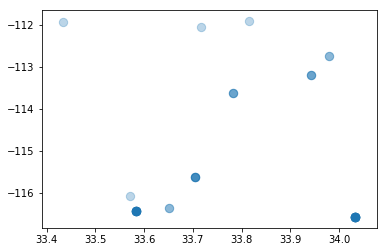

In [238]:
%matplotlib inline
#plt.plot.scatter(x='elevation',y='avg(coeff_1)');
plt.scatter(x=df_wwus[['latitude']],y=df_wwus[['longitude']], s=70, alpha=0.3)

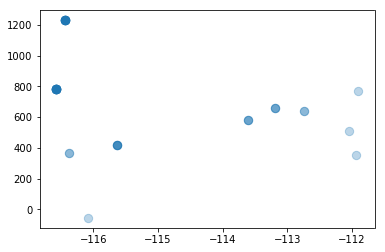

In [246]:
plt.scatter(x=df_wwus[['longitude']],y=df_wwus[['elevation']],s=70, alpha=0.3)

In [243]:
df_ww.mean()

year          1959.913043
elevation      657.326087
latitude        33.841404
longitude     -114.818361
vector_sum       1.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122bb7f50>]], dtype=object)

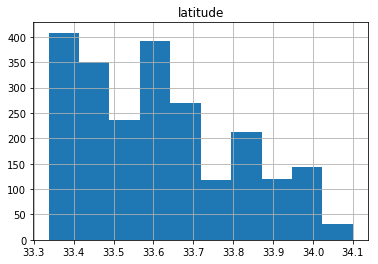

In [257]:
Eig[['latitude']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122ad2a10>]], dtype=object)

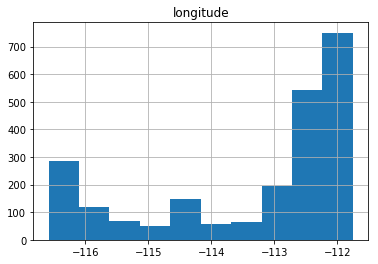

In [256]:
Eig[['longitude']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12287bb50>]], dtype=object)

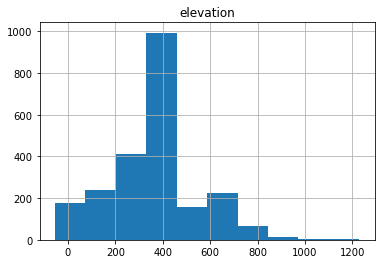

In [255]:
Eig[['elevation']].hist()

In [258]:
Eig.mean()

coeff_1          0.006346
coeff_2         -0.004847
coeff_3          0.001379
elevation      347.758589
latitude        33.614487
longitude     -113.328224
res_1            0.459037
res_2            0.245918
res_3            0.182711
res_mean              inf
total_var      504.585013
undefs           3.986854
year          1967.783523
vector_sum       0.010079
dtype: float64

In [259]:
Eig.std()

coeff_1          16.566254
coeff_2           9.898711
coeff_3           6.506992
elevation       190.809069
latitude          0.195317
longitude         1.606033
res_1             0.089694
res_2             0.074926
res_3             0.075875
res_mean               NaN
total_var     14027.602681
undefs            9.732854
year             24.378240
vector_sum        0.099908
dtype: float64

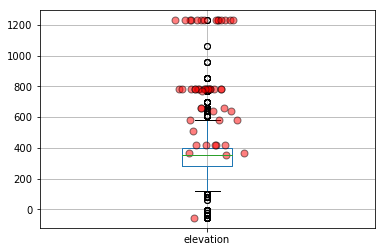

In [277]:
Eig[['elevation']].boxplot()

for i,d in enumerate(df_wwus[['elevation']]):
    y = df_wwus[d]
    #print y
    x = np.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, mfc = ["red","blue","yellow"][i], mec='k', ms=7, marker="o", linestyle="None", alpha=.5)

#plt.hlines(1,0,4,linestyle="--")